In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Preparation

# About the Dataset

## Importing dataset

In [2]:
dataset_url = 'dataset/churn_dataset.csv'
df = pd.read_csv(dataset_url)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 2. Dataset Description

In [4]:
df.shape

(10000, 14)

In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

This dataset consists of both numerical and categorical data with 10,000 rows and 14 attributes, as given below:
a)	RowNumber: Index for the records

b)	CustomerId: Unique identifier for each customer

c)	Surname: Customer's last name

d)	CreditScore: Customer's credit score

e)	Geography: Customer's location (France, Germany, or Spain)

f)	Gender: Customer's gender (Male or Female)

g)	Age: Customer's age

h)	Tenure: Number of years the customer has been with the bank

i)	Balance: Customer's account balance

j)	NumOfProducts: Number of bank products the customer is using.

k)	HasCrCard: Whether the customer has a credit card (1) or not (0)

l)	IsActiveMember: Whether the customer is an active member (1) or not (0)

m)	EstimatedSalary: Estimated salary of the customer

n)	Exited: Whether the customer has left the bank (1) or not (0)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# 3. Missing values handling

In [12]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Here, this dataset does not have any missing values

# 4. Exploratory Data Analysis

In [67]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [64]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [63]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [72]:
df['Exited'].value_counts(normalize=True) * 100

0    79.63
1    20.37
Name: Exited, dtype: float64

Here, Among 10000 customers, 5457 are male and 4543 are female. 7055 customers has credit card and 2945 don't have credit card. (2037)20.37% of customers have churned and 7963(79.63% of customers are retained.)  

In [76]:
df[df['HasCrCard']==1]['Gender'].value_counts()


Male      3863
Female    3192
Name: Gender, dtype: int64

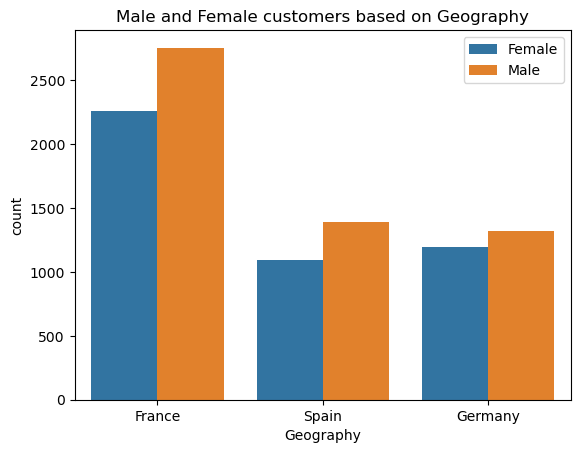

In [80]:
sns.countplot(x = 'Geography', data=df, hue='Gender')
plt.title('Male and Female customers based on Geography')
plt.legend()
plt.show()

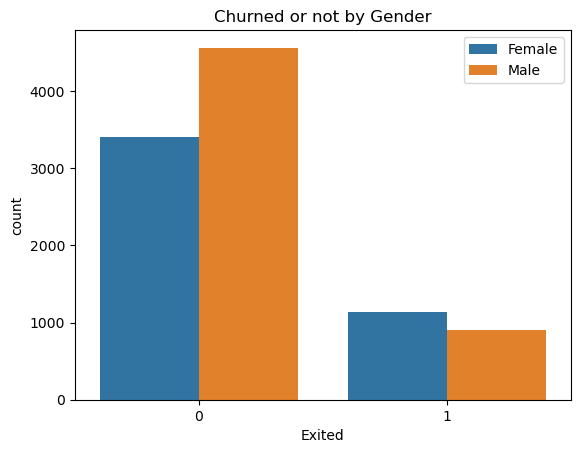

In [90]:
sns.countplot(x = 'Exited', hue='Gender', data=df)
plt.title('Churned or not by Gender')
plt.legend()
plt.show()

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

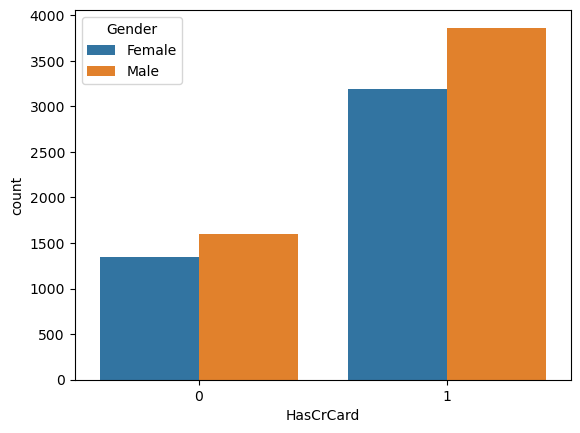

In [95]:
sns.countplot(x = 'HasCrCard', data=df, hue='Gender')
plt.legend()

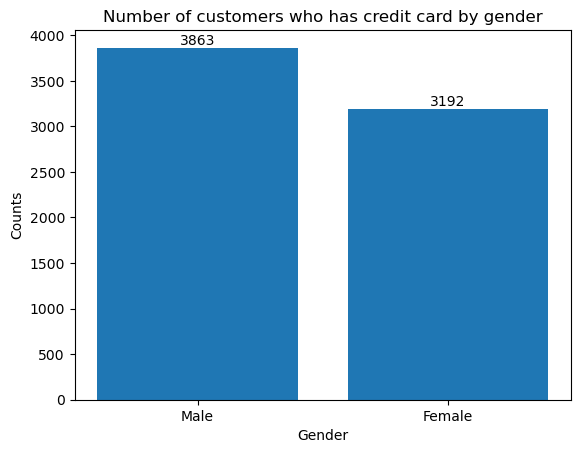

In [91]:
hascard = df[df['HasCrCard']==1]['Gender'].value_counts()
fig, ax = plt.subplots()
bars = ax.bar(hascard.index,hascard.values)
ax.bar_label(bars,labels=hascard.values,label_type='edge')
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title('Number of customers who has credit card by gender')
plt.show()